<a href="https://colab.research.google.com/github/lilyaYAHIAOUI/bloods.ai/blob/main/blood_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [1]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
maindir = "/content/drive/MyDrive/competition/Zindi/bloods.ai/data" # Directory with your files
traincsv = maindir+"/Train.csv"
testcsv = maindir+"/Test.csv"

In [3]:
train = pd.read_csv(traincsv)
train.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,0.536170,0.546407,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,0.557474,0.554371,0.552386,0.548702,0.544238,0.542579,0.540514,0.538980,0.536650,0.536483,0.535447,0.537577,0.535715,0.536895,0.539589,0.541081,0.544893,0.547765,0.551773,...,1.469838,1.462617,1.445696,1.435586,1.417847,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,1.291677,1.285579,1.285488,1.275784,1.271104,1.264029,1.250779,1.254856,1.255224,1.249623,1.244419,1.244437,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,0.534423,0.548646,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,0.564101,0.559951,0.556193,0.552271,0.550086,0.546207,0.542366,0.539789,0.537221,0.534336,0.533868,0.533018,0.532227,0.530818,0.532171,0.533658,0.535266,0.538939,0.542399,0.546479,0.550606,...,1.552979,1.541997,1.533186,1.518359,1.498964,1.488043,1.472946,1.465925,1.452647,1.437819,1.423670,1.415103,1.401141,1.403560,1.384169,1.379410,1.374128,1.356969,1.352693,1.342430,1.339714,1.332805,1.336324,1.342537,1.332407,1.326258,1.336874,1.327538,1.311951,1.309399,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,0.505892,0.518125,0.530362,0.538530,0.543128,0.546287,0.547001,0.547120,0.546351,0.544254,0.542802,0.542207,0.539779,0.536417,0.533380,0.531117,0.529093,0.526101,0.524599,0.522952,0.521551,0.521149,0.520478,0.521432,0.521473,0.523567,0.525816,0.527889,0.530697,0.533416,...,1.516723,1.502255,1.489132,1.483308,1.461028,1.453174,1.450412,1.437784,1.422148,1.415880,1.404698,1.388143,1.397241,1.385680,1.376355,1.357758,1.354854,1.345476,1.333810,1.332739,1.335550,1.326775,1.336862,1.316860,1.328051,1.328641,1.323526,1.314124,1.298936,1.289122,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,0.565502,0.581143,0.594354,0.599457,0.604529,0.605267,0.606276,0.604895,0.603716,0.600683,0.598087,0.594303,0.589403,0.585883,0.581369,0.578962,0.575181,0.573274,0.570471,0.568241,0.565671,0.564579,0.563724,0.561978,0.562744,0.563455,0.565163,0.566505,0.569239,0.572075,...,1.442957,1.423349,1.413718,1.403112,1.393964,1.375741,1.369549,1.354179,1.344562,1.333491,1.325002,1.321572,1.305561,1.292637,1.287971,1.283460,1.278300,1.268486,1.268407,1.263479,1.252612,1.254306,1.247635,1.242321,1.247859,1.246749,1.249920,1.265223,1.264013,1.285252,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.55

# data exploration 

In [4]:
print(train.shape)
#train.drop(["Reading_ID"], axis=1, inplace=True)

(13140, 176)


In [5]:
columns_list =train.columns
numerical_features = columns_list[1:173]
categorical_features = columns_list[173:]


In [6]:
print(numerical_features)
print(len(numerical_features))

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance162', 'absorbance163', 'absorbance164', 'absorbance165',
       'absorbance166', 'absorbance167', 'absorbance168', 'absorbance169',
       'temperature', 'humidity'],
      dtype='object', length=172)
172


In [7]:
print(categorical_features)
print(len(categorical_features))

Index(['hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human'],
      dtype='object')
3


In [8]:
print(columns_list)
print(len(columns_list))

Index(['Reading_ID', 'absorbance0', 'absorbance1', 'absorbance2',
       'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6',
       'absorbance7', 'absorbance8',
       ...
       'absorbance165', 'absorbance166', 'absorbance167', 'absorbance168',
       'absorbance169', 'temperature', 'humidity', 'hdl_cholesterol_human',
       'hemoglobin(hgb)_human', 'cholesterol_ldl_human'],
      dtype='object', length=176)
176


In [9]:
train.isna().sum()# there is no missing values

Reading_ID               0
absorbance0              0
absorbance1              0
absorbance2              0
absorbance3              0
                        ..
temperature              0
humidity                 0
hdl_cholesterol_human    0
hemoglobin(hgb)_human    0
cholesterol_ldl_human    0
Length: 176, dtype: int64

In [10]:
train.describe()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
count,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,...,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000
mean,0.507347,0.509800,0.513687,0.519391,0.525976,0.533482,0.539453,0.544755,0.552902,0.565279,0.578415,0.590215,0.597083,0.600618,0.602828,0.603434,0.602075,0.599335,0.596222,0.593066,0.589816,0.586821,0.583665,0.580336,0.577325,0.574321,0.571803,0.569906,0.568239,0.566951,0.566204,0.565929,0.566327,0.567358,0.568966,0.571237,0.574091,0.577933,0.581767,0.585947,...,1.534435,1.520587,1.507206,1.494436,1.481857,1.470147,1.458943,1.447029,1.436010,1.424403,1.413153,1.402854,1.394788,1.382297,1.373392,1.364888,1.356420,1.348587,1.341277,1.333918,1.327140,1.320583,1.314208,1.309417,1.305020,1.301597,1.299224,1.298162,1.297279,1.296103,1.292939,1.287715,1.279190,1.271131,1.264782,1.262234,1.274563,1.261993,41.088709,31.534744
std,0.042075,0.041587,0.041525,0.041676,0.041125,0.040644,0.040715,0.040946,0.040820,0.041038,0.041164,0.041268,0.041501,0.041560,0.041508,0.041379,0.041080,0.040716,0.040453,0.040368,0.040127,0.040101,0.040019,0.039927,0.039915,0.039767,0.039740,0.039792,0.039787,0.039715,0.039708,0.039738,0.039781,0.039860,0.039862,0.039979,0.040065,0.040266,0.040384,0.040327,...,0.079317,0.077226,0.075690,0.073972,0.072704,0.071497,0.070351,0.069132,0.068116,0.066951,0.066179,0.065450,0.065161,0.063811,0.063188,0.062849,0.062148,0.061847,0.061448,0.060891,0.060457,0.060267,0.059903,0.059883,0.059731,0.059607,0.059692,0.060137,0.060583,0.062033,0.064989,0.069659,0.077427,0.085519,0.092525,0.097079,0.103298,0.102908,2.964205,8.118994
min,0.237409,0.251987,0.269550,0.284636,0.302883,0.318334,0.333950,0.345124,0.361352,0.374106,0.388672,0.407299,0.416705,0.420315,0.423078,0.423848,0.423839,0.422310,0.421942,0.419578,0.416689,0.414667,0.413794,0.410312,0.408713,0.405934,0.403518,0.402689,0.401398,0.400746,0.399525,0.399710,0.399237,0.400620,0.403256,0.404547,0.407792,0.412233,0.416269,0.421089,...,1.292400,1.280019,1.269119,1.258771,1.252074,1.243098,1

In [11]:
train.dtypes

Reading_ID                object
absorbance0              float64
absorbance1              float64
absorbance2              float64
absorbance3              float64
                          ...   
temperature              float64
humidity                 float64
hdl_cholesterol_human     object
hemoglobin(hgb)_human     object
cholesterol_ldl_human     object
Length: 176, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


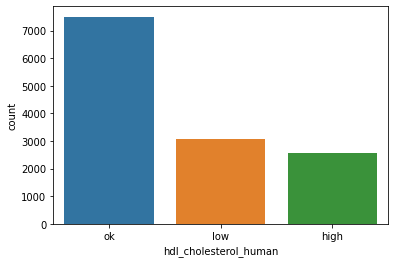

In [12]:
sns.countplot(train["hdl_cholesterol_human"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


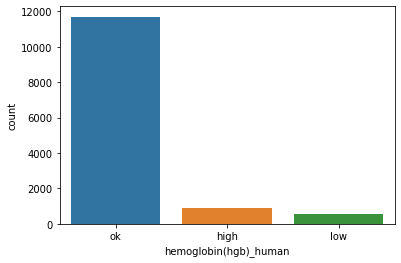

In [13]:
sns.countplot(train["hemoglobin(hgb)_human"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


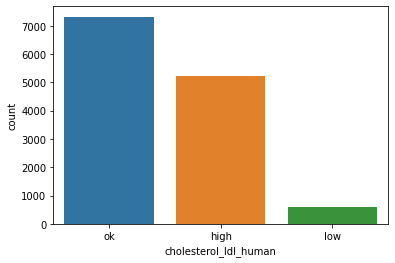

In [14]:
sns.countplot(train["cholesterol_ldl_human"])

## heat map

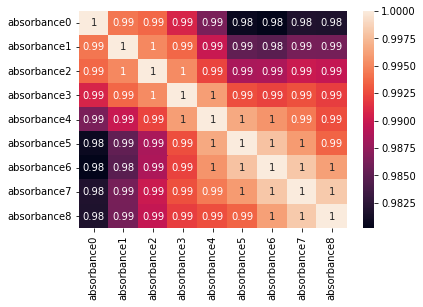

In [15]:
sns.heatmap(train[columns_list[1:10]].corr(),annot=True)

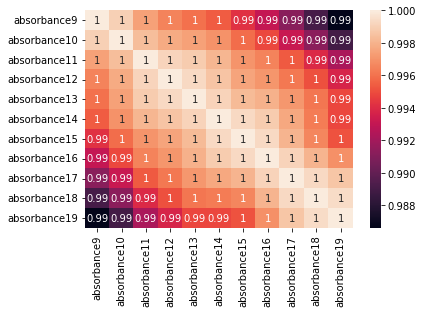

In [16]:
sns.heatmap(train[columns_list[10:21]].corr(),annot=True)

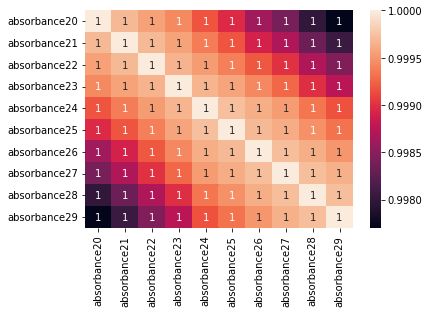

In [17]:
sns.heatmap(train[columns_list[21:31]].corr(),annot=True)

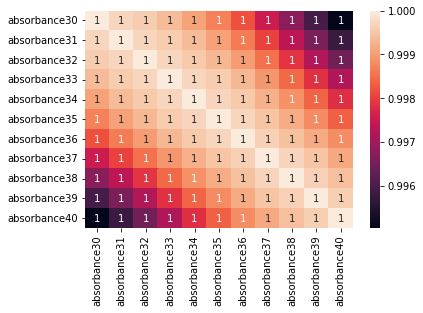

In [18]:
sns.heatmap(train[columns_list[31:42]].corr(),annot=True)

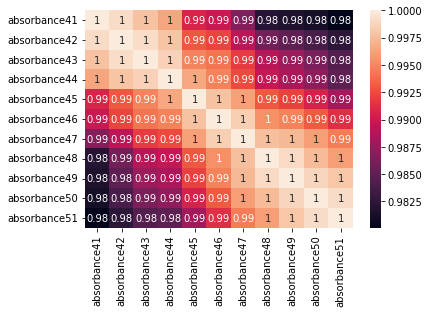

In [19]:
sns.heatmap(train[columns_list[42:53]].corr(),annot=True)

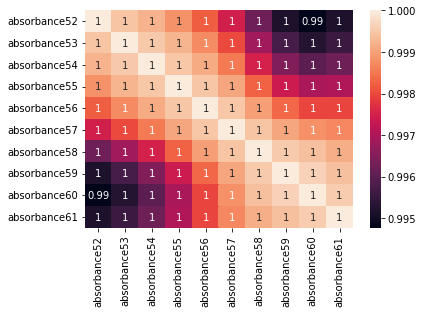

In [20]:
sns.heatmap(train[columns_list[53:63]].corr(),annot=True)

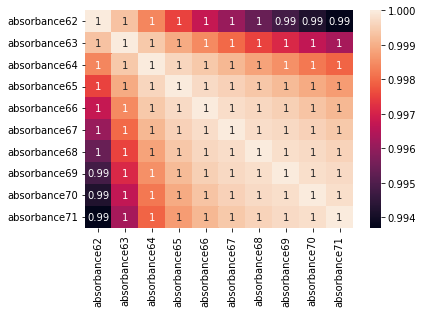

In [21]:



sns.heatmap(train[columns_list[63:73]].corr(),annot=True)

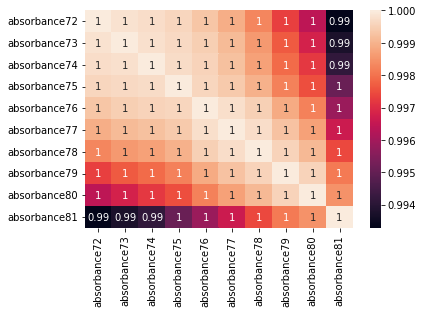

In [22]:
sns.heatmap(train[columns_list[73:83]].corr(),annot=True)

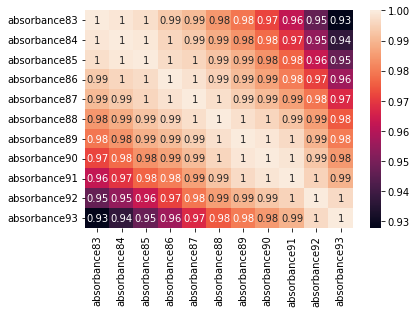

In [23]:
sns.heatmap(train[columns_list[84:95]].corr(),annot=True)

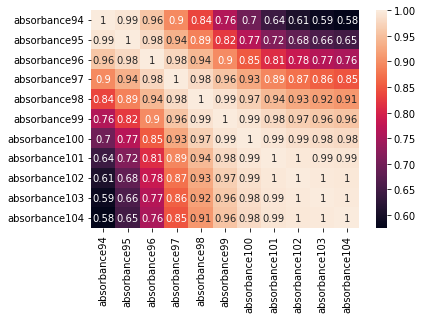

In [24]:
sns.heatmap(train[columns_list[95:106]].corr(),annot=True)

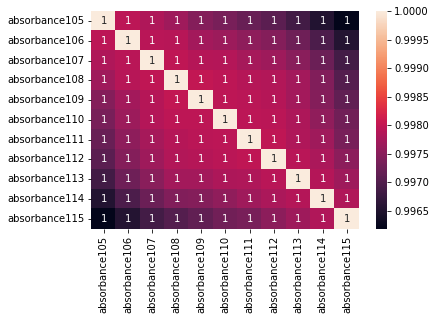

In [25]:
sns.heatmap(train[columns_list[106:117]].corr(),annot=True)

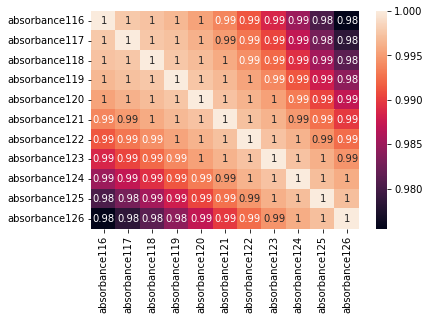

In [26]:
sns.heatmap(train[columns_list[117:128]].corr(),annot=True)

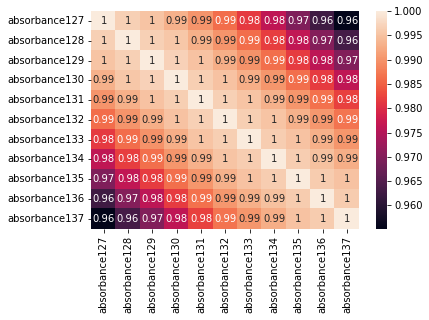

In [27]:
sns.heatmap(train[columns_list[128:139]].corr(),annot=True)

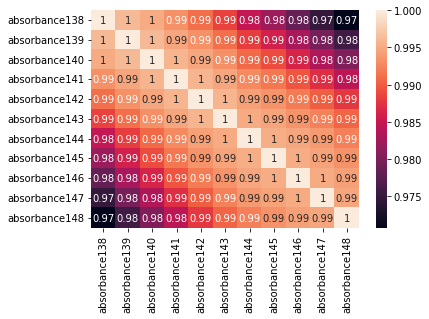

In [28]:
sns.heatmap(train[columns_list[139:150]].corr(),annot=True)

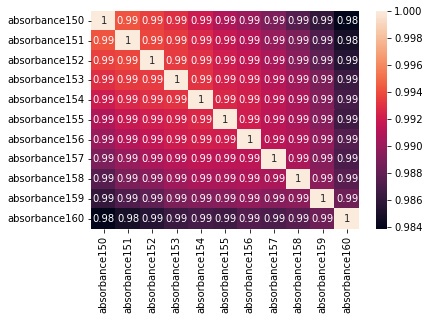

In [29]:
sns.heatmap(train[columns_list[151:162]].corr(),annot=True)

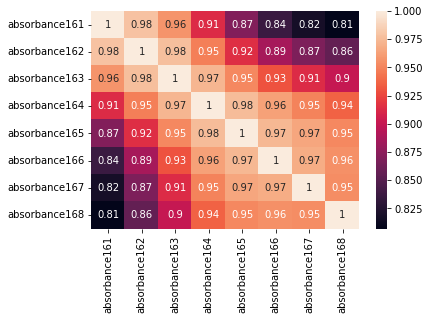

In [30]:
sns.heatmap(train[columns_list[162:170]].corr(),annot=True)

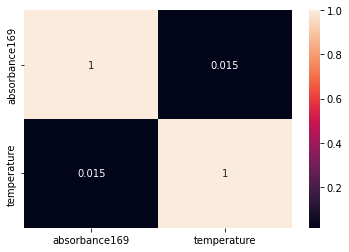

In [31]:
sns.heatmap(train[columns_list[170:172]].corr(),annot=True)

For better visualization, I printed the correlation among a group of 10. From the visualizations, we can notice that these features are highly correlated. To minimize the total number of features, I decided to only take one among a group of 10 features. 

In [49]:
remaind_feature = ['absorbance8','absorbance19','absorbance29','absorbance40','absorbance51','absorbance61','absorbance71','absorbance81','absorbance83','absorbance93',
                   'absorbance94','absorbance95','absorbance96','absorbance97','absorbance98','absorbance99','absorbance100','absorbance101','absorbance102','absorbance103',
                   'absorbance104','absorbance115','absorbance126','absorbance137','absorbance140','absorbance160','absorbance161',
                   'absorbance162','absorbance163','absorbance164','absorbance165','absorbance166','absorbance167','absorbance168',
                   'absorbance169','humidity',"temperature"]

#
# Handling outlier

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 =  col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range


In [34]:
print(numerical_features)

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance162', 'absorbance163', 'absorbance164', 'absorbance165',
       'absorbance166', 'absorbance167', 'absorbance168', 'absorbance169',
       'temperature', 'humidity'],
      dtype='object', length=172)


In [35]:
for feature in numerical_features:
  lower_range, upper_range= remove_outlier(train[feature])
  train.drop(train[(train[feature]> upper_range )].index, inplace = True)
  train.drop(train[(train[feature]< lower_range )].index, inplace = True)






In [36]:
print(numerical_features)

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance162', 'absorbance163', 'absorbance164', 'absorbance165',
       'absorbance166', 'absorbance167', 'absorbance168', 'absorbance169',
       'temperature', 'humidity'],
      dtype='object', length=172)


In [ ]:
train.shape

(11400, 176)

In [ ]:
train.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,0.536170,0.546407,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,0.557474,0.554371,0.552386,0.548702,0.544238,0.542579,0.540514,0.538980,0.536650,0.536483,0.535447,0.537577,0.535715,0.536895,0.539589,0.541081,0.544893,0.547765,0.551773,...,1.469838,1.462617,1.445696,1.435586,1.417847,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,1.291677,1.285579,1.285488,1.275784,1.271104,1.264029,1.250779,1.254856,1.255224,1.249623,1.244419,1.244437,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,0.534423,0.548646,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,0.564101,0.559951,0.556193,0.552271,0.550086,0.546207,0.542366,0.539789,0.537221,0.534336,0.533868,0.533018,0.532227,0.530818,0.532171,0.533658,0.535266,0.538939,0.542399,0.546479,0.550606,...,1.552979,1.541997,1.533186,1.518359,1.498964,1.488043,1.472946,1.465925,1.452647,1.437819,1.423670,1.415103,1.401141,1.403560,1.384169,1.379410,1.374128,1.356969,1.352693,1.342430,1.339714,1.332805,1.336324,1.342537,1.332407,1.326258,1.336874,1.327538,1.311951,1.309399,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,0.505892,0.518125,0.530362,0.538530,0.543128,0.546287,0.547001,0.547120,0.546351,0.544254,0.542802,0.542207,0.539779,0.536417,0.533380,0.531117,0.529093,0.526101,0.524599,0.522952,0.521551,0.521149,0.520478,0.521432,0.521473,0.523567,0.525816,0.527889,0.530697,0.533416,...,1.516723,1.502255,1.489132,1.483308,1.461028,1.453174,1.450412,1.437784,1.422148,1.415880,1.404698,1.388143,1.397241,1.385680,1.376355,1.357758,1.354854,1.345476,1.333810,1.332739,1.335550,1.326775,1.336862,1.316860,1.328051,1.328641,1.323526,1.314124,1.298936,1.289122,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,0.565502,0.581143,0.594354,0.599457,0.604529,0.605267,0.606276,0.604895,0.603716,0.600683,0.598087,0.594303,0.589403,0.585883,0.581369,0.578962,0.575181,0.573274,0.570471,0.568241,0.565671,0.564579,0.563724,0.561978,0.562744,0.563455,0.565163,0.566505,0.569239,0.572075,...,1.442957,1.423349,1.413718,1.403112,1.393964,1.375741,1.369549,1.354179,1.344562,1.333491,1.325002,1.321572,1.305561,1.292637,1.287971,1.283460,1.278300,1.268486,1.268407,1.263479,1.252612,1.254306,1.247635,1.242321,1.247859,1.246749,1.249920,1.265223,1.264013,1.285252,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.55

## Feature scaling

In [37]:
numerical_features

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance162', 'absorbance163', 'absorbance164', 'absorbance165',
       'absorbance166', 'absorbance167', 'absorbance168', 'absorbance169',
       'temperature', 'humidity'],
      dtype='object', length=172)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr = scaler.fit_transform(train[numerical_features])
standardized_data = pd.DataFrame(arr, columns=train[numerical_features].columns)
standardized_data

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,-0.845006,-0.987987,-0.773427,-0.814718,-0.751683,-0.916914,-0.819835,-0.880448,-0.839688,-0.848217,-0.930025,-0.824320,-0.818856,-0.820101,-0.913209,-0.985901,-1.000081,-0.983251,-1.008516,-0.980473,-0.955572,-0.958917,-0.925027,-0.938356,-0.981707,-0.945069,-0.932040,-0.919164,-0.939179,-0.907276,-0.916246,-0.842574,-0.910470,-0.904330,-0.870386,-0.893036,-0.862267,-0.886204,-0.877815,-0.919864,...,-0.180000,-0.205914,-0.265912,-0.379953,-0.296706,-0.391450,-0.379462,-0.489094,-0.543998,-0.621541,-0.630977,-0.688753,-0.617045,-0.756934,-0.624152,-0.813412,-0.734497,-0.705991,-0.953449,-0.936631,-0.808937,-0.873546,-0.845139,-0.890802,-1.073815,-0.923668,-0.868314,-0.958004,-1.043097,-1.003270,-0.920527,-1.076650,-0.701620,-0.733578,-0.658897,-0.779117,-0.905318,-0.924420,0.582425,0.297267
1,-1.094878,-1.089499,-1.015427,-1.002904,-1.034893,-1.056795,-1.023239,-1.002264,-0.896925,-0.899910,-0.864019,-0.916127,-0.905362,-0.883008,-0.909883,-0.958647,-0.972814,-0.954528,-0.942596,-0.973594,-0.994341,-1.022525,-0.994845,-1.014283,-1.038655,-1.030293,-1.032720,-1.060821,-1.023983,-1.013152,-1.014565,-1.048810,-1.018412,-1.002682,-1.001494,-0.957868,-0.937598,-0.924762,-0.912654,-0.925577,...,1.258538,1.173323,1.226221,0.979311,1.026704,1.094704,1.050228,0.938289,0.955607,0.906062,0.993707,0.951771,0.830539,0.813203,0.827414,0.726577,0.945354,0.724426,0.779015,0.826620,0.623754,0.670425,0.597050,0.639703,0.589920,0.732359,0.906464,0.720272,0.610194,0.838724,0.692011,0.461569,0.513121,0.511034,0.805634,0.583825,-0.092642,0.040745,1.341465,0.052963
2,-1.910352,-1.582516,-2.004531,-1.857003,-1.867251,-1.717750,-1.859000,-1.863934,-1.861776,-1.744292,-1.763679,-1.737454,-1.689846,-1.657089,-1.628396,-1.626879,-1.597906,-1.557399,-1.537313,-1.488884,-1.417538,-1.400855,-1.409688,-1.404608,-1.380727,-1.356954,-1.372777,-1.357801,-1.356848,-1.363512,-1.352885,-1.364301,-1.345505,-1.372872,-1.356346,-1.355235,-1.375842,-1.397929,-1.425757,-1.352617,...,0.091990,0.390717,0.322869,0.386567,0.364136,0.346369,0.444808,0.270745,0.331904,0.496674,0.477035,0.384513,0.420473,0.451814,0.308880,0.651192,0.596564,0.571217,0.351451,0.442824,0.393394,0.291328,0.401116,0.555495,0.467626,0.743286,0.384533,0.631982,0.658321,0.572727,0.433280,0.226491,0.186205,0.809108,0.114564,0.977829,0.217271,1.028312,1.813504,-0.874626
3,0.192514,0.112190,0.278131,0.058195,-0.074713,-0.087927,0.016319,0.062913,0.001305,0.019860,0.093876,0.135731,0.085723,0.130514,0.086507,0.097680,0.098839,0.148151,0.153576,0.172341,0.158874,0.102061,0.091614,0.055702,0.074283,0.050559,0.069707,0.041286,0.024080,-0.015491,-0.026634,-0.044753,-0.110575,-0.118962,-0.146518,-0.163848,-0.209520,-0.242347,-0.271838,-0.296428,...,-0.766136,-0.843059,-0.759251,-0.819430,-0.951393,-0.934644,-0.940369,-0.909361,-1.053139,-0.972393,-1.057983,-1.058544,-1.119505,-1.066302,-0.971502,-1.120938,-1.218407,-1.161578,-1.115702,-1.081571,-1.149713,-1.02

In [39]:
train_np = np.array(train)

In [40]:

labels = train_np[:, 172:]
labels_n = np.zeros(labels.shape)
labels_n[np.where(labels=='low')] = 0
labels_n[np.where(labels=='ok')] = 1
labels_n[np.where(labels=='high')] = 2


In [41]:
labels_n.shape

(11400, 4)

# modeling

## RandomForestClassifier

In [ ]:
train.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,0.536170,0.546407,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,0.557474,0.554371,0.552386,0.548702,0.544238,0.542579,0.540514,0.538980,0.536650,0.536483,0.535447,0.537577,0.535715,0.536895,0.539589,0.541081,0.544893,0.547765,0.551773,...,1.469838,1.462617,1.445696,1.435586,1.417847,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,1.291677,1.285579,1.285488,1.275784,1.271104,1.264029,1.250779,1.254856,1.255224,1.249623,1.244419,1.244437,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,0.534423,0.548646,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,0.564101,0.559951,0.556193,0.552271,0.550086,0.546207,0.542366,0.539789,0.537221,0.534336,0.533868,0.533018,0.532227,0.530818,0.532171,0.533658,0.535266,0.538939,0.542399,0.546479,0.550606,...,1.552979,1.541997,1.533186,1.518359,1.498964,1.488043,1.472946,1.465925,1.452647,1.437819,1.423670,1.415103,1.401141,1.403560,1.384169,1.379410,1.374128,1.356969,1.352693,1.342430,1.339714,1.332805,1.336324,1.342537,1.332407,1.326258,1.336874,1.327538,1.311951,1.309399,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,0.505892,0.518125,0.530362,0.538530,0.543128,0.546287,0.547001,0.547120,0.546351,0.544254,0.542802,0.542207,0.539779,0.536417,0.533380,0.531117,0.529093,0.526101,0.524599,0.522952,0.521551,0.521149,0.520478,0.521432,0.521473,0.523567,0.525816,0.527889,0.530697,0.533416,...,1.516723,1.502255,1.489132,1.483308,1.461028,1.453174,1.450412,1.437784,1.422148,1.415880,1.404698,1.388143,1.397241,1.385680,1.376355,1.357758,1.354854,1.345476,1.333810,1.332739,1.335550,1.326775,1.336862,1.316860,1.328051,1.328641,1.323526,1.314124,1.298936,1.289122,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,0.565502,0.581143,0.594354,0.599457,0.604529,0.605267,0.606276,0.604895,0.603716,0.600683,0.598087,0.594303,0.589403,0.585883,0.581369,0.578962,0.575181,0.573274,0.570471,0.568241,0.565671,0.564579,0.563724,0.561978,0.562744,0.563455,0.565163,0.566505,0.569239,0.572075,...,1.442957,1.423349,1.413718,1.403112,1.393964,1.375741,1.369549,1.354179,1.344562,1.333491,1.325002,1.321572,1.305561,1.292637,1.287971,1.283460,1.278300,1.268486,1.268407,1.263479,1.252612,1.254306,1.247635,1.242321,1.247859,1.246749,1.249920,1.265223,1.264013,1.285252,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.55

In [ ]:
standardized_data

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,-0.845006,-0.987987,-0.773427,-0.814718,-0.751683,-0.916914,-0.819835,-0.880448,-0.839688,-0.848217,-0.930025,-0.824320,-0.818856,-0.820101,-0.913209,-0.985901,-1.000081,-0.983251,-1.008516,-0.980473,-0.955572,-0.958917,-0.925027,-0.938356,-0.981707,-0.945069,-0.932040,-0.919164,-0.939179,-0.907276,-0.916246,-0.842574,-0.910470,-0.904330,-0.870386,-0.893036,-0.862267,-0.886204,-0.877815,-0.919864,...,-0.180000,-0.205914,-0.265912,-0.379953,-0.296706,-0.391450,-0.379462,-0.489094,-0.543998,-0.621541,-0.630977,-0.688753,-0.617045,-0.756934,-0.624152,-0.813412,-0.734497,-0.705991,-0.953449,-0.936631,-0.808937,-0.873546,-0.845139,-0.890802,-1.073815,-0.923668,-0.868314,-0.958004,-1.043097,-1.003270,-0.920527,-1.076650,-0.701620,-0.733578,-0.658897,-0.779117,-0.905318,-0.924420,0.582425,0.297267
1,-1.094878,-1.089499,-1.015427,-1.002904,-1.034893,-1.056795,-1.023239,-1.002264,-0.896925,-0.899910,-0.864019,-0.916127,-0.905362,-0.883008,-0.909883,-0.958647,-0.972814,-0.954528,-0.942596,-0.973594,-0.994341,-1.022525,-0.994845,-1.014283,-1.038655,-1.030293,-1.032720,-1.060821,-1.023983,-1.013152,-1.014565,-1.048810,-1.018412,-1.002682,-1.001494,-0.957868,-0.937598,-0.924762,-0.912654,-0.925577,...,1.258538,1.173323,1.226221,0.979311,1.026704,1.094704,1.050228,0.938289,0.955607,0.906062,0.993707,0.951771,0.830539,0.813203,0.827414,0.726577,0.945354,0.724426,0.779015,0.826620,0.623754,0.670425,0.597050,0.639703,0.589920,0.732359,0.906464,0.720272,0.610194,0.838724,0.692011,0.461569,0.513121,0.511034,0.805634,0.583825,-0.092642,0.040745,1.341465,0.052963
2,-1.910352,-1.582516,-2.004531,-1.857003,-1.867251,-1.717750,-1.859000,-1.863934,-1.861776,-1.744292,-1.763679,-1.737454,-1.689846,-1.657089,-1.628396,-1.626879,-1.597906,-1.557399,-1.537313,-1.488884,-1.417538,-1.400855,-1.409688,-1.404608,-1.380727,-1.356954,-1.372777,-1.357801,-1.356848,-1.363512,-1.352885,-1.364301,-1.345505,-1.372872,-1.356346,-1.355235,-1.375842,-1.397929,-1.425757,-1.352617,...,0.091990,0.390717,0.322869,0.386567,0.364136,0.346369,0.444808,0.270745,0.331904,0.496674,0.477035,0.384513,0.420473,0.451814,0.308880,0.651192,0.596564,0.571217,0.351451,0.442824,0.393394,0.291328,0.401116,0.555495,0.467626,0.743286,0.384533,0.631982,0.658321,0.572727,0.433280,0.226491,0.186205,0.809108,0.114564,0.977829,0.217271,1.028312,1.813504,-0.874626
3,0.192514,0.112190,0.278131,0.058195,-0.074713,-0.087927,0.016319,0.062913,0.001305,0.019860,0.093876,0.135731,0.085723,0.130514,0.086507,0.097680,0.098839,0.148151,0.153576,0.172341,0.158874,0.102061,0.091614,0.055702,0.074283,0.050559,0.069707,0.041286,0.024080,-0.015491,-0.026634,-0.044753,-0.110575,-0.118962,-0.146518,-0.163848,-0.209520,-0.242347,-0.271838,-0.296428,...,-0.766136,-0.843059,-0.759251,-0.819430,-0.951393,-0.934644,-0.940369,-0.909361,-1.053139,-0.972393,-1.057983,-1.058544,-1.119505,-1.066302,-0.971502,-1.120938,-1.218407,-1.161578,-1.115702,-1.081571,-1.149713,-1.02

In [ ]:
standardized_data["Reading_ID"] = train["Reading_ID"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train , y_val = train_test_split(standardized_data, labels_n, test_size = 0.2)

In [ ]:
idx_train = x_train.Reading_ID.values
x_train.drop(["Reading_ID"], axis=1, inplace=True)
x_train= x_train.to_numpy()

In [ ]:
idx_val = x_val.Reading_ID.values
x_val.drop(["Reading_ID"], axis=1, inplace=True)
x_val= x_val.to_numpy()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle


In [ ]:
forest = RandomForestClassifier(n_estimators=100)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

model_random_forest = multi_target_forest.fit(x_train,y_train )

In [ ]:
model_random_forest

MultiOutputClassifier(estimator=RandomForestClassifier(), n_jobs=-1)

In [54]:
def mymodel(features,model):
    output = model.predict(features)
    return output

In [55]:
def transform(value):
    if value == 0.0:
        return 'low'
    elif value == 1.0:
        return 'ok'
    else:
        return 'high'
        

In [56]:
def transform_c_hdl(row):
    return str(row["Reading_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

In [57]:
def transform_hemo(row):
    return str(row["Reading_ID"]) + "_hemoglobin(hgb)_human" +  "-" + row["hemoglobin(hgb)_human"]

In [58]:
def transform_c_ldl(row):
    return str(row["Reading_ID"]) + "_cholesterol_ldl_human" +  "-" + row["cholesterol_ldl_human"]

### predict on validation set

In [ ]:
predictions_forest = mymodel(x_val,model_random_forest)

# Save the results to csv
val_forest = pd.DataFrame()
val_forest["Reading_ID"] = idx_val
val_forest["hdl_cholesterol_human"] = predictions_forest[:,0]
val_forest["hemoglobin(hgb)_human"] = predictions_forest[:,1]
val_forest["cholesterol_ldl_human"] = predictions_forest[:,2]

In [ ]:
val_forest["hdl_cholesterol_human"] = val_forest["hdl_cholesterol_human"].apply(lambda x: transform(x))
val_forest["hemoglobin(hgb)_human"] = val_forest["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
val_forest["cholesterol_ldl_human"] = val_forest["cholesterol_ldl_human"].apply(lambda x: transform(x))

In [ ]:
val_forest.columns

Index(['Reading_ID', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human'],
      dtype='object')

In [ ]:
hdl_rows = pd.DataFrame(val_forest.apply(transform_c_hdl, axis=1))

In [ ]:
hemo_rows = pd.DataFrame(val_forest.apply(transform_hemo, axis=1))

In [ ]:
ldl_rows = pd.DataFrame(val_forest.apply(transform_c_ldl, axis=1))

In [ ]:
val_forest = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [ ]:
val_forest["target"] = val_forest[0].apply(lambda x: x.split("-")[1])
val_forest[0] = val_forest[0].apply(lambda x: x.split("-")[0])

In [ ]:
val_forest = val_forest.rename(columns={0:"Reading_ID"})

In [ ]:
val_forest

,Reading_ID,target
0,ID_VURP2ELT_hdl_cholesterol_human,low
1,ID_9QEEVX7I_hdl_cholesterol_human,low
2,ID_F820Z3RQ_hdl_cholesterol_human,low
3,ID_G4V1CPP3_hdl_cholesterol_human,low
4,ID_1LG4SOXV_hdl_cholesterol_human,low
...,...,...
6835,ID_6OAJGXU1_cholesterol_ldl_human,ok
6836,ID_RPWRF9NY_cholesterol_ldl_human,ok
6837,ID_XQPYKFUP_cholesterol_ldl_human,ok
6838,ID_QF6FOKTX_cholesterol_ldl_human,ok


### predict on test set

In [ ]:
test_df = pd.read_csv(testcsv)
test_df.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,ID_37BEI22R,0.449736,0.449798,0.447488,0.464694,0.466377,0.485350,0.488915,0.495073,0.504129,0.512690,0.528313,0.540020,0.550252,0.555062,0.555983,0.562491,0.559443,0.562695,0.558805,0.559067,0.557602,0.554924,0.553300,0.549671,0.548033,0.544539,0.542640,0.541228,0.540335,0.539378,0.539134,0.538375,0.538068,0.540340,0.541754,0.543920,0.547749,0.550490,0.553550,...,1.393886,1.389147,1.385912,1.377751,1.372950,1.366470,1.360301,1.351162,1.346405,1.350380,1.340395,1.326046,1.324390,1.322257,1.314661,1.308962,1.308751,1.298821,1.285794,1.294162,1.286025,1.288414,1.287432,1.266873,1.272191,1.270802,1.263687,1.252631,1.248400,1.249067,1.223793,1.195193,1.205222,1.164610,1.151594,1.166565,1.157079,1.200857,40.88,25.70
1,ID_4W85V5DV,0.495429,0.505488,0.510239,0.518880,0.533147,0.543142,0.551670,0.558261,0.564027,0.575223,0.588780,0.603260,0.609797,0.613326,0.616530,0.617400,0.617284,0.615343,0.611668,0.608864,0.606411,0.602919,0.599854,0.597024,0.592800,0.590059,0.586417,0.585922,0.583848,0.583204,0.582259,0.581994,0.582528,0.584993,0.587332,0.590686,0.591674,0.595796,0.599694,...,1.563284,1.553378,1.538660,1.524748,1.508455,1.495151,1.494071,1.476984,1.459555,1.449668,1.444659,1.432336,1.425302,1.407856,1.404927,1.400641,1.385942,1.380131,1.367970,1.367653,1.364312,1.357998,1.348350,1.346009,1.330666,1.334532,1.335588,1.315017,1.319510,1.320977,1.310219,1.294600,1.269705,1.244257,1.238365,1.218063,1.252711,1.255433,42.35,30.16
2,ID_L4YR3NDY,0.437904,0.439064,0.442527,0.450437,0.455363,0.465817,0.471249,0.479145,0.482595,0.497043,0.508849,0.520005,0.526073,0.529009,0.530775,0.530869,0.529993,0.529816,0.525386,0.522270,0.518925,0.516824,0.514363,0.510227,0.506540,0.503605,0.501884,0.499315,0.498547,0.497386,0.496028,0.495754,0.495847,0.495887,0.497499,0.499683,0.501803,0.504862,0.508623,...,1.411109,1.392950,1.382620,1.359417,1.348743,1.334049,1.325644,1.307332,1.295699,1.284021,1.276139,1.262930,1.252719,1.237859,1.231942,1.223501,1.213700,1.206026,1.197681,1.197900,1.196079,1.185196,1.175500,1.169110,1.165897,1.165072,1.167966,1.156225,1.156836,1.158974,1.162556,1.161711,1.160406,1.159570,1.159641,1.157491,1.177478,1.169607,42.83,25.51
3,ID_U88E3SQ6,0.495038,0.506246,0.508730,0.518995,0.529961,0.537583,0.539696,0.540400,0.547279,0.561166,0.572493,0.583802,0.588819,0.591780,0.596486,0.595962,0.595182,0.588548,0.584253,0.579974,0.576841,0.573102,0.569567,0.565961,0.563061,0.560563,0.556971,0.555630,0.554065,0.554014,0.552711,0.552815,0.552691,0.555071,0.557024,0.558817,0.563014,0.566382,0.571307,...,1.398357,1.390639,1.384277,1.367990,1.358839,1.353192,1.342092,1.332669,1.323776,1.316251,1.305992,1.291256,1.288653,1.275216,1.272748,1.262883,1.255950,1.249526,1.244164,1.232735,1.228173,1.214810,1.219419,1.212290,1.208059,1.203898,1.200965,1.200299,1.195953,1.179682,1.168321,1.137272,1.109380,1.047561,1.050649,1.020026,1.033139,1.023882,40.95,41.32
4,ID_NW7Z3XU7,0.531306,0.525309,0.535306,0

#### feature scaling on test set

In [ ]:
scaler = StandardScaler()
arr = scaler.fit_transform(test_df[numerical_features])
standardized_test = pd.DataFrame(arr, columns=train[numerical_features].columns)
standardized_test

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,-1.492095,-1.548036,-1.719096,-1.392706,-1.519719,-1.271254,-1.322738,-1.294756,-1.276883,-1.356279,-1.293976,-1.304838,-1.220567,-1.189489,-1.222346,-1.087102,-1.144443,-1.021454,-1.052849,-0.977769,-0.945526,-0.940807,-0.904774,-0.912698,-0.870440,-0.884556,-0.871561,-0.855141,-0.834328,-0.827953,-0.811367,-0.824210,-0.838769,-0.807874,-0.809977,-0.809766,-0.780172,-0.803635,-0.819416,-0.784851,...,-1.675007,-1.609650,-1.513865,-1.479600,-1.408559,-1.368874,-1.322659,-1.308320,-1.243889,-1.045266,-1.045460,-1.122226,-1.032193,-0.910960,-0.902110,-0.874110,-0.759000,-0.796355,-0.888888,-0.662720,-0.691082,-0.560342,-0.482226,-0.726975,-0.583866,-0.551593,-0.632769,-0.783666,-0.828601,-0.788965,-1.074103,-1.328020,-0.999121,-1.279800,-1.291227,-1.086452,-1.254367,-0.768541,0.069690,-0.785564
1,-0.340624,-0.147101,-0.130188,-0.045423,0.151506,0.203661,0.258168,0.280401,0.214500,0.185912,0.189976,0.238314,0.227885,0.225439,0.248221,0.252646,0.280219,0.292655,0.275996,0.280369,0.298647,0.284458,0.287425,0.301809,0.274446,0.283759,0.253986,0.290703,0.280671,0.298819,0.294783,0.295027,0.299870,0.334464,0.353652,0.380760,0.333463,0.337398,0.338761,0.379744,...,0.383772,0.433437,0.416012,0.413443,0.356607,0.332656,0.469901,0.395642,0.309954,0.336954,0.420228,0.389522,0.394913,0.330718,0.415856,0.473322,0.385846,0.414510,0.342613,0.446152,0.499209,0.501115,0.454417,0.493786,0.319936,0.436258,0.479263,0.175400,0.251339,0.277625,0.145354,-0.019985,-0.235072,-0.420934,-0.416996,-0.589390,-0.379461,-0.251428,0.674166,-0.246226
2,-1.790247,-1.818056,-1.844706,-1.747191,-1.795393,-1.769752,-1.767799,-1.691830,-1.813039,-1.742160,-1.771654,-1.793235,-1.808744,-1.822194,-1.834604,-1.858671,-1.869813,-1.842127,-1.892919,-1.907469,-1.931413,-1.913472,-1.901888,-1.924374,-1.931559,-1.935187,-1.919448,-1.929674,-1.905113,-1.907572,-1.917059,-1.917831,-1.920048,-1.945101,-1.939831,-1.935896,-1.945041,-1.952797,-1.947029,-1.984241,...,-1.465695,-1.562331,-1.555452,-1.715708,-1.723888,-1.797576,-1.787083,-1.901896,-1.940210,-1.969065,-1.948735,-2.019914,-2.045759,-2.135216,-2.109883,-2.130151,-2.168732,-2.178255,-2.209356,-2.115165,-2.058633,-2.134849,-2.203226,-2.235078,-2.226763,-2.190460,-2.113221,-2.265725,-2.219168,-2.125229,-1.938145,-1.768585,-1.530133,-1.334147,-1.210147,-1.174036,-1.067739,-1.064632,0.871546,-0.808541
3,-0.350496,-0.128043,-0.168405,-0.042556,0.071765,0.061774,-0.043477,-0.164838,-0.202497,-0.160760,-0.209733,-0.236489,-0.282418,-0.297814,-0.238601,-0.270427,-0.264183,-0.376147,-0.413139,-0.449538,-0.455114,-0.476745,-0.488194,-0.494880,-0.486111,-0.473278,-0.503102,-0.485915,-0.482503,-0.451668,-0.463109,-0.453694,-0.464266,-0.431001,-0.420135,-0.430521,-0.393150,-0.403394,-0.373736,-0.387029,...,-1.620674,-1.591087,-1.534525,-1.605295,-1.592377,-1.544451,-1.566678,-1.558762,-1.554648,-1.520387,-1.529080,-1.617029,-1.537588,-1.593315,-1.514079,-1.551341,-1.542104,-1.530456,

In [ ]:
# save it ids before dropping them
idx = test_df.Reading_ID.values
test_df.drop(["Reading_ID"], axis=1, inplace=True)
test= test_df.to_numpy()

In [ ]:
test_df.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance162', 'absorbance163', 'absorbance164', 'absorbance165',
       'absorbance166', 'absorbance167', 'absorbance168', 'absorbance169',
       'temperature', 'humidity'],
      dtype='object', length=172)

In [ ]:
test_df.shape

(3660, 172)

In [ ]:
test_df

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,0.449736,0.449798,0.447488,0.464694,0.466377,0.485350,0.488915,0.495073,0.504129,0.512690,0.528313,0.540020,0.550252,0.555062,0.555983,0.562491,0.559443,0.562695,0.558805,0.559067,0.557602,0.554924,0.553300,0.549671,0.548033,0.544539,0.542640,0.541228,0.540335,0.539378,0.539134,0.538375,0.538068,0.540340,0.541754,0.543920,0.547749,0.550490,0.553550,0.559024,...,1.393886,1.389147,1.385912,1.377751,1.372950,1.366470,1.360301,1.351162,1.346405,1.350380,1.340395,1.326046,1.324390,1.322257,1.314661,1.308962,1.308751,1.298821,1.285794,1.294162,1.286025,1.288414,1.287432,1.266873,1.272191,1.270802,1.263687,1.252631,1.248400,1.249067,1.223793,1.195193,1.205222,1.164610,1.151594,1.166565,1.157079,1.200857,40.88,25.70
1,0.495429,0.505488,0.510239,0.518880,0.533147,0.543142,0.551670,0.558261,0.564027,0.575223,0.588780,0.603260,0.609797,0.613326,0.616530,0.617400,0.617284,0.615343,0.611668,0.608864,0.606411,0.602919,0.599854,0.597024,0.592800,0.590059,0.586417,0.585922,0.583848,0.583204,0.582259,0.581994,0.582528,0.584993,0.587332,0.590686,0.591674,0.595796,0.599694,0.605431,...,1.563284,1.553378,1.538660,1.524748,1.508455,1.495151,1.494071,1.476984,1.459555,1.449668,1.444659,1.432336,1.425302,1.407856,1.404927,1.400641,1.385942,1.380131,1.367970,1.367653,1.364312,1.357998,1.348350,1.346009,1.330666,1.334532,1.335588,1.315017,1.319510,1.320977,1.310219,1.294600,1.269705,1.244257,1.238365,1.218063,1.252711,1.255433,42.35,30.16
2,0.437904,0.439064,0.442527,0.450437,0.455363,0.465817,0.471249,0.479145,0.482595,0.497043,0.508849,0.520005,0.526073,0.529009,0.530775,0.530869,0.529993,0.529816,0.525386,0.522270,0.518925,0.516824,0.514363,0.510227,0.506540,0.503605,0.501884,0.499315,0.498547,0.497386,0.496028,0.495754,0.495847,0.495887,0.497499,0.499683,0.501803,0.504862,0.508623,0.511230,...,1.411109,1.392950,1.382620,1.359417,1.348743,1.334049,1.325644,1.307332,1.295699,1.284021,1.276139,1.262930,1.252719,1.237859,1.231942,1.223501,1.213700,1.206026,1.197681,1.197900,1.196079,1.185196,1.175500,1.169110,1.165897,1.165072,1.167966,1.156225,1.156836,1.158974,1.162556,1.161711,1.160406,1.159570,1.159641,1.157491,1.177478,1.169607,42.83,25.51
3,0.495038,0.506246,0.508730,0.518995,0.529961,0.537583,0.539696,0.540400,0.547279,0.561166,0.572493,0.583802,0.588819,0.591780,0.596486,0.595962,0.595182,0.588548,0.584253,0.579974,0.576841,0.573102,0.569567,0.565961,0.563061,0.560563,0.556971,0.555630,0.554065,0.554014,0.552711,0.552815,0.552691,0.555071,0.557024,0.558817,0.563014,0.566382,0.571307,0.574877,...,1.398357,1.390639,1.384277,1.367990,1.358839,1.353192,1.342092,1.332669,1.323776,1.316251,1.305992,1.291256,1.288653,1.275216,1.272748,1.262883,1.255950,1.249526,1.244164,1.232735,1.228173,1.214810,1.219419,1.212290,1.208059,1.203898,1.200965,1.200299,1.195953,1.179682,1.168321,1.137272,1.109380,1.047561,1.050649,1.020026,1.033139,1.023882,40.95,41.32
4,0.531306,0.525309,0.535306,0.541387,0.551364,0.559

In [ ]:
predictions_forest = mymodel(standardized_test,model_random_forest)

# Save the results to csv
ss = pd.DataFrame()
ss["Reading_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions_forest[:,0]
ss["hemoglobin(hgb)_human"] = predictions_forest[:,1]
ss["cholesterol_ldl_human"] = predictions_forest[:,2]




In [ ]:
ss

,Reading_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_37BEI22R,0.0,1.0,1.0
1,ID_4W85V5DV,0.0,1.0,1.0
2,ID_L4YR3NDY,0.0,1.0,1.0
3,ID_U88E3SQ6,0.0,2.0,1.0
4,ID_NW7Z3XU7,0.0,1.0,1.0
...,...,...,...,...
3655,ID_ADCBL266,0.0,2.0,1.0
3656,ID_SW51B61O,0.0,1.0,1.0
3657,ID_CO8IHJRA,0.0,1.0,1.0
3658,ID_VN5CP3ZZ,0.0,1.0,1.0


In [ ]:
ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x: transform(x))
ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x: transform(x))

In [ ]:
hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))

In [ ]:
hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))

In [ ]:
ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))

In [ ]:
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [ ]:
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])

In [ ]:
ss = ss.rename(columns={0:"Reading_ID"})

In [ ]:

ss.to_csv(maindir+"/random_forest2.csv", index=False) # got 0.4777 accuracy

In [ ]:
ss.shape

(10980, 2)

## xgboost

In [ ]:
import xgboost as xgb


In [ ]:
xgboost =xgb.XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 10)

multi_target_forest = MultiOutputClassifier(xgboost, n_jobs=-1)
model = multi_target_forest.fit(x_train, y_train)

In [ ]:
type(standardized_test)

pandas.core.frame.DataFrame

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
test_np = standardized_test.to_numpy()

In [ ]:
predictions = mymodel(test_np, model)
# Save the results to csv
ss = pd.DataFrame()
ss["Reading_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions[:,0]
ss["hemoglobin(hgb)_human"] = predictions[:,1]
ss["cholesterol_ldl_human"] = predictions[:,2]

In [ ]:

        

ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x: transform(x))
ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x: transform(x))



hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))



hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))



ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])
ss = ss.rename(columns={0:"Reading_ID"})

ss.to_csv(maindir+"/submission8.csv", index=False)

# modeling with remained feature

In [50]:
remaind_feature

['absorbance8',
 'absorbance19',
 'absorbance29',
 'absorbance40',
 'absorbance51',
 'absorbance61',
 'absorbance71',
 'absorbance81',
 'absorbance83',
 'absorbance93',
 'absorbance94',
 'absorbance95',
 'absorbance96',
 'absorbance97',
 'absorbance98',
 'absorbance99',
 'absorbance100',
 'absorbance101',
 'absorbance102',
 'absorbance103',
 'absorbance104',
 'absorbance115',
 'absorbance126',
 'absorbance137',
 'absorbance140',
 'absorbance160',
 'absorbance161',
 'absorbance162',
 'absorbance163',
 'absorbance164',
 'absorbance165',
 'absorbance166',
 'absorbance167',
 'absorbance168',
 'absorbance169',
 'humidity',
 'temperature']

In [51]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import xgboost as xgb

In [65]:

xgboost =xgb.XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 10)

multi_target_forest = MultiOutputClassifier(xgboost, n_jobs=-1)
train_np = standardized_data[remaind_feature].to_numpy()
model = multi_target_forest.fit(train_np,labels_n)

test_df = pd.read_csv(testcsv)
idx = test_df.Reading_ID.values

scaler = StandardScaler()
arr = scaler.fit_transform(test_df[numerical_features])
standardized_test = pd.DataFrame(arr, columns=train[numerical_features].columns)


standardized_test2= standardized_test[remaind_feature]
test_np = standardized_test2.to_numpy()
predictions = mymodel(test_np, model)
# Save the results to csv
ss = pd.DataFrame()
ss["Reading_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions[:,0]
ss["hemoglobin(hgb)_human"] = predictions[:,1]
ss["cholesterol_ldl_human"] = predictions[:,2]


ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x: transform(x))
ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x: transform(x))



hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))



hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))



ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])
ss = ss.rename(columns={0:"Reading_ID"})

ss.to_csv(maindir+"/submission9.csv", index=False)

,absorbance8,absorbance19,absorbance29,absorbance40,absorbance51,absorbance61,absorbance71,absorbance81,absorbance83,absorbance93,absorbance94,absorbance95,absorbance96,absorbance97,absorbance98,absorbance99,absorbance100,absorbance101,absorbance102,absorbance103,absorbance104,absorbance115,absorbance126,absorbance137,absorbance140,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,humidity,temperature
0,-0.839688,-0.980473,-0.907276,-0.854089,-0.930193,-0.888277,-0.924640,-0.988811,-1.042206,-0.846587,-0.947550,-0.982550,-1.042686,-0.618030,-0.485336,-0.272353,-0.086461,0.047443,0.230221,0.322906,0.297172,0.378820,0.093639,-0.391450,-0.543998,-1.043097,-1.003270,-0.920527,-1.076650,-0.701620,-0.733578,-0.658897,-0.779117,-0.905318,-0.924420,0.297267,0.582425
1,-0.896925,-0.973594,-1.013152,-0.849735,-0.584446,-0.643260,-0.371631,-0.040454,-0.049771,0.532233,0.642313,0.845282,0.915579,1.419293,1.396088,1.412315,1.394575,1.208684,1.448818,1.400991,1.458819,1.323850,1.207442,1.094704,0.955607,0.610194,0.838724,0.692011,0.461569,0.513121,0.511034,0.805634,0.583825,-0.092642,0.040745,0.052963,1.341465
2,-1.861776,-1.488884,-1.363512,-1.398864,-1.098191,-1.240609,-1.110073,-0.956111,-0.807435,-0.266481,0.036997,0.104024,0.105172,0.157159,-0.016478,0.045448,-0.076788,-0.080096,-0.156304,-0.173547,-0.153943,-0.168983,0.110970,0.346369,0.331904,0.658321,0.572727,0.433280,0.226491,0.186205,0.809108,0.114564,0.977829,0.217271,1.028312,-0.874626,1.813504
3,0.001305,0.172341,-0.015491,-0.369687,-0.644114,-0.508858,-0.738702,-0.837890,-0.891440,-0.714340,-0.797680,-0.725673,-0.799734,-0.848695,-0.568721,-0.577322,-0.503926,-0.545838,-0.590026,-0.543796,-0.391900,-0.414216,-0.581828,-0.934644,-1.053139,-0.996031,-0.894008,-0.509888,-0.404303,0.123806,0.422906,0.497563,0.649213,0.376844,1.082997,0.668811,1.839938
4,0.437666,0.724701,0.872344,0.825776,0.428736,0.505461,0.805451,0.523637,0.450369,-0.549523,-0.900307,-1.146537,-1.200328,-1.523469,-1.520243,-1.615377,-1.545786,-1.529241,-1.372321,-1.320137,-1.347525,-1.226169,-1.047148,-0.762173,-0.568985,-0.058550,-0.014273,0.098244,-0.259686,-0.084961,0.045131,0.366503,1.011405,0.609123,1.072674,-0.991687,-0.773272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,-0.684138,-0.851340,-0.817076,-0.715737,-0.802723,-0.768946,-0.707836,-0.649850,-0.730314,-0.910182,-0.970568,-0.938336,-1.033829,-0.772907,-0.938535,-1.034053,-0.952745,-0.940557,-0.967800,-0.927925,-0.829182,-0.912344,-1.182324,-1.455397,-1.648216,-1.524437,-1.528348,-1.490500,-1.407818,-1.212971,-1.154177,-1.063712,-0.670251,-0.995501,-0.835841,0.668811,-2.332890
11396,0.433520,0.370461,0.356287,0.485855,0.678264,0.625125,0.615628,0.789802,0.832623,1.287064,1.636284,1.814566,1.690853,1.600356,1.311451,1.285461,1.230703,1.034085,0.822489,0.868108,0.777893,0.845767,1.102284,1.364473,1.507938,1.651107,1.286944,1.701649,1.661388,1.442716,1.724097,1.501059,1.424866,1.474590,1.532935,-1.594811,0.812781
11397,0.454468,0.739508,0.701924,0.662107,0.679575,0.788792,0.856427,0.791727,0.895412,0.766065,0.638577,0.542968,0.723517,0.595557,0.389371,0.361784,0.349266,0.482285,0.549032,0.439021,0.458775,0.590249,0.714474,0.959278,0.946642,1.382549,1.452348,1.372282,1.790875,1.750384,1.850187,1.533306,2.130101,2.100890,1.491501,1.493334,0.571096
11398,-1.316499,-1.187853,-1.099638,-1.074417,-1.273617,-1.444861,-1.277366,-1.389352,-1.383661,-2.019750,-1.960929,-2.050250,-2.295073,-2.365899,-2.394620,-2.429677,-2.348463,-2.257802,-2.252751,-2.171547,-2.147280,-2.131319,-2.190321,-2.126516,-1.934710,-1.639811,-1.592376,-1.432978,-1.406201,-1.489411,-1.272607,-1.199703,-1.080028,-1.401861,-0.543558,0.435959,0.336965


In [60]:
test_np.shape

(3660, 37)

In [61]:
standardized_data[remaind_feature].shape

(11400, 37)